For a given image need to find objects in the image

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Image as image
import csv
import torch.nn as nn
import torch.nn.functional as F
import torch
import seaborn as sns

# Dataset

In [9]:
with open('/kaggle/input/fashion-product-images-small/styles.csv','r') as file:
    data = file.readlines()

In [10]:
len(data)

44447

In [11]:

Data = pd.read_csv('/kaggle/input/fashion-product-images-small/styles.csv',skiprows=[6043,6568,7398,7938,9025,10263,10426,10904,11372,11944
                                                                                    ,14111,14531,15075,29905,31624,33019,35747
                                                                                    ,35961,37769,38104,38274,38403,])
Data.head(5)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [12]:
print(f"No.of Products in our dataset : {len(Data)}")
print(f"No.of Unique SubCategory in our dataset : {Data['subCategory'].nunique()}")
print(f"No.of Unique Gender types in our dataset: {Data['gender'].nunique()}")
print(f"No.of Unique article types in our dataset: {Data['articleType'].nunique()}")

No.of Products in our dataset : 44424
No.of Unique SubCategory in our dataset : 45
No.of Unique Gender types in our dataset: 5
No.of Unique article types in our dataset: 143


In [13]:
print(f"Sub Catogory wise No.of products distribution: {Data['subCategory'].value_counts()}")

Sub Catogory wise No.of products distribution: subCategory
Topwear                     15402
Shoes                        7343
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1079
Eyewear                      1073
Fragrance                    1011
Sandal                        963
Wallets                       933
Flip Flops                    913
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree                         427
Nails                         329
Makeup                        307
Headwear                      293
Ties                          258
Accessories                   129
Scarves                       118
Cufflinks                     108
Apparel Set                   106
Free Gifts                    104
Stoles                 

In [14]:
print(f"Gender wise No.of products distribution: {Data['gender'].value_counts()}")

Gender wise No.of products distribution: gender
Men       22147
Women     18631
Unisex     2161
Boys        830
Girls       655
Name: count, dtype: int64


In [15]:
# display(Image('/kaggle/input/fashion-product-images-small/images/39386.jpg', width = 224, height = 224,embed=True))""

SyntaxError: invalid syntax (1363205727.py, line 1)

# CLIP Model

In [16]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

url = "/kaggle/input/fashion-product-images-small/images/39386.jpg"
image = Image.open(url)

inputs = processor(text=['Photo of blue jean','Photo of black jean'], images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities
print(f"probabilities list : {probs}")

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
2024-07-19 02:43:37.859898: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-19 02:43:37.860075: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-19 02:43:38.019948: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one h

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

probabilities list : tensor([[0.9154, 0.0846]], grad_fn=<SoftmaxBackward0>)


### Comparison with respect to Sub Category

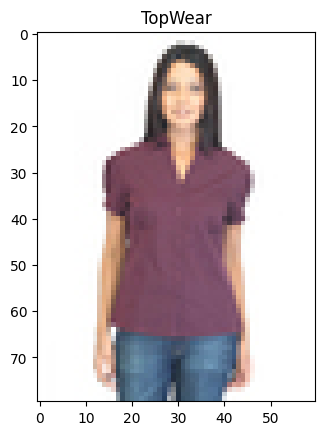

In [17]:
img1_path = f"/kaggle/input/fashion-product-images-small/images/{Data[(Data['subCategory']=='Topwear')&(Data['gender']=='Women')]['id'].iloc[0]}.jpg"
plt.imshow(plt.imread(img1_path))
plt.title('TopWear')
plt.show()

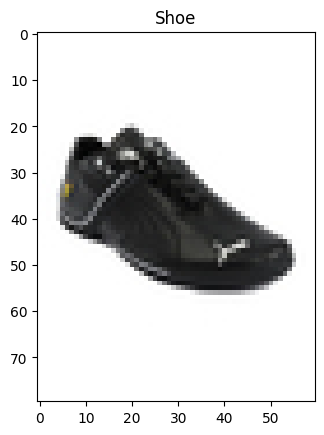

In [18]:
img2_path = f"/kaggle/input/fashion-product-images-small/images/{Data[(Data['subCategory']=='Shoes')]['id'].iloc[0]}.jpg"
plt.imshow(plt.imread(img2_path))
plt.title('Shoe')
plt.show()

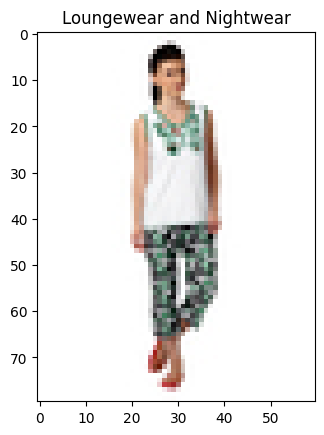

In [19]:
img3_path = f"/kaggle/input/fashion-product-images-small/images/{Data[(Data['subCategory']=='Loungewear and Nightwear')]['id'].iloc[0]}.jpg"
plt.imshow(plt.imread(img3_path))
plt.title('Loungewear and Nightwear')
plt.show()

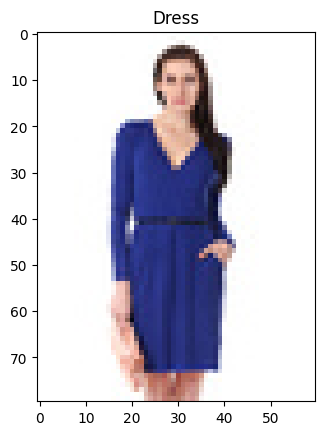

In [20]:
img4_path = f"/kaggle/input/fashion-product-images-small/images/{Data[(Data['subCategory']=='Dress')]['id'].iloc[0]}.jpg"
plt.imshow(plt.imread(img4_path))
plt.title('Dress')
plt.show()

In [21]:
img0 = Image.open(f"/kaggle/input/fashion-product-images-small/images/{Data[(Data['subCategory']=='Topwear')&(Data['gender']=='Women')]['id'].iloc[1]}.jpg")
img1 = Image.open(img1_path)
img2 = Image.open(img2_path)
img3 = Image.open(img3_path)
img4 = Image.open(img4_path)

In [22]:
inputs = processor(text=[''], images=[img0,img1,img2,img3,img4], return_tensors="pt", padding=True)

outputs = model(**inputs)

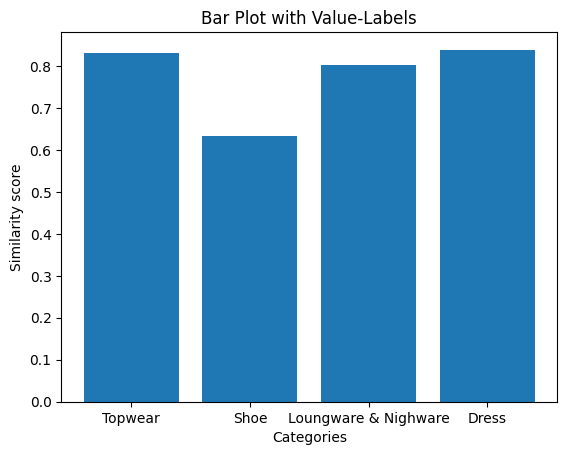

In [23]:
categories = ['Topwear','Shoe','Loungware & Nighware','Dress']
cosine_similarity = F.cosine_similarity(outputs.image_embeds[0], outputs.image_embeds[1:], dim=1)
plt.bar(categories,cosine_similarity.detach().numpy())

# Display the plot
plt.xlabel('Categories')
plt.ylabel('Similarity score')
plt.title('Bar Plot with Value-Labels')
plt.show()
# heatmap = sns.heatmap(cosine_similarity.detach().numpy(),annot=True,xticklabels =labels,yticklabels=labels)
# plt.title("Shows similarity between images of different gender jeans")
# plt.xlabel('Image')
# plt.ylabel("Image")
# plt.show()

### Comparison with respect to gender

In [24]:
Data[(Data['articleType']=='Jeans') & (Data['gender']=='Women') & (Data['baseColour']=='Blue')]['id'].iloc[1]


51499

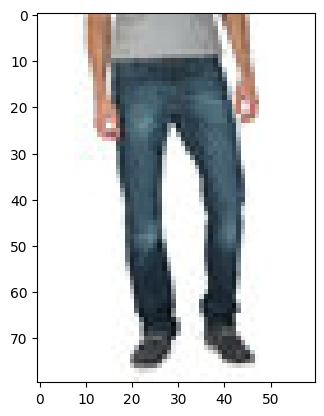

In [56]:
url1 = f"/kaggle/input/fashion-product-images-small/images/{Data[(Data['articleType']=='Jeans') & (Data['gender']=='Men') & (Data['baseColour']=='Blue')]['id'].iloc[0]}.jpg"
plt.imshow(plt.imread(url1))
plt.show()

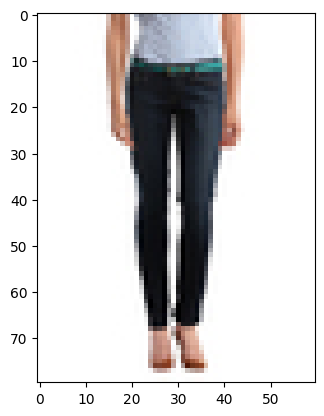

In [57]:
url2 = f"/kaggle/input/fashion-product-images-small/images/{Data[(Data['articleType']=='Jeans') & (Data['gender']=='Women') & (Data['baseColour']=='Blue')]['id'].iloc[1]}.jpg"
plt.imshow(plt.imread(url2))
plt.show()


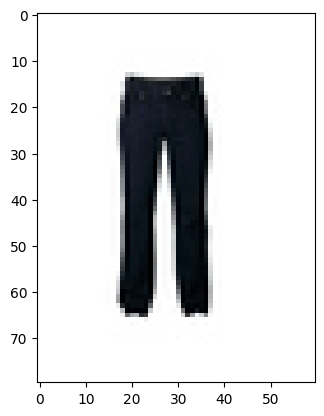

In [58]:
url3  = f"/kaggle/input/fashion-product-images-small/images/{Data[(Data['articleType']=='Jeans') & (Data['gender']=='Boys') & (Data['baseColour']=='Black')]['id'].iloc[3]}.jpg"
plt.imshow(plt.imread(url3))
plt.show()


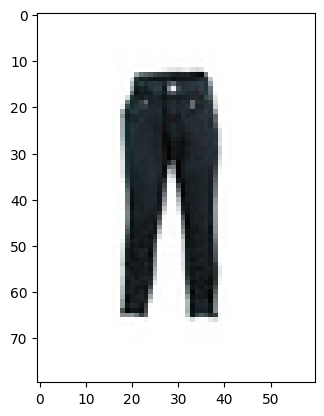

In [59]:
url4  = f"/kaggle/input/fashion-product-images-small/images/{Data[(Data['articleType']=='Jeans') & (Data['gender']=='Girls') & (Data['baseColour']=='Black')]['id'].iloc[2]}.jpg"
plt.imshow(plt.imread(url4))
plt.show()

In [ ]:
img1 = Image.open(url1)
img2 = Image.open(url2)
img3 = Image.open(url3)
img4 = Image.open(url4)

In [ ]:
inputs = processor(text=[''], images=[img1,img2,img3,img4], return_tensors="pt", padding=True)

outputs = model(**inputs)

In [ ]:
labels = ['Men','Women','Boy','Girl']
cosine_similarity = F.cosine_similarity(outputs.image_embeds.unsqueeze(1), outputs.image_embeds.unsqueeze(0), dim=2)

heatmap = sns.heatmap(cosine_similarity.detach().numpy(),annot=True,xticklabels =labels,yticklabels=labels)
plt.title("Shows similarity between images of different gender jeans")
plt.xlabel('Image')
plt.ylabel("Image")
plt.show()

In [ ]:
text = [f'Photo of {i}' for i in Data['articleType'].unique()] 

In [ ]:


inputs = processor(text=text, images=[img1], return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities
print(f"probabilities list : {probs}")

In [ ]:
print(f"The article Type is {Data['articleType'].unique()[torch.argmax(probs,dim=1).cpu().numpy()][0]}")

In [ ]:
# plt.figure(figsize=(20, 10))  # Adjust the figure size to accommodate the labels
# labels = Data['articleType'].unique().tolist()
# probs = probs.detach().cpu().numpy()
# plt.bar(labels, probs)
# # Add titles and labels
# plt.title("Labels and Corresponding Probabilities")
# plt.xlabel("Labels")
# plt.ylabel("Probabilities")

# # Rotate x labels for better visibility
# plt.xticks(rotation=90)

# # Show plot
# plt.tight_layout()  # Adjust layout to ensure everything fits without overlap
# plt.show()

# Object Detection

Here we are using pretrained model which trained on fashion dataset

In [26]:
!pip install inference_sdk

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 4.5 MB/s eta 0:00:00


In [39]:
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="1iWoqOGUCTvPLU8DWzIy"
)

result = CLIENT.infer(img4_path, model_id="fashion-hkjfr/5")

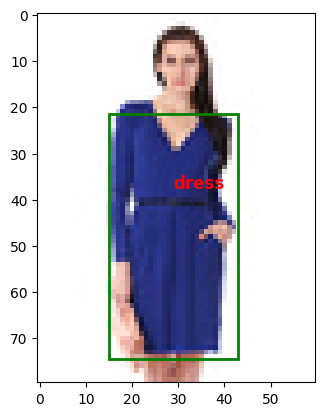

In [43]:
import matplotlib.patches as patches
fig, ax = plt.subplots()
img = plt.imread(img4_path)
ax.imshow(img)
for i in result['predictions']:
    x,y =i['x'], i['y']
    w,h =i['width'], i['height']
    rect = patches.Rectangle((x-w//2, y-h//2), w, h, linewidth=2, edgecolor='g', facecolor='none')
    ax.add_patch(rect)
    ax.text(x, y - 10, i['class'], color='r',fontsize=12, fontweight='bold')
# Show plot
plt.show()

In [50]:
x,y,w,h

(29.0, 47.5, 28.0, 53.0)

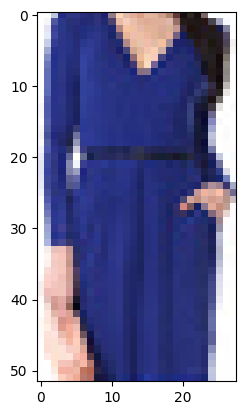

In [55]:
plt.imshow(img[int(y-h//2):int(y+h//2),int(x-w//2):int(x+w//2),:])
plt.show()

# Recommending top - 5

In [28]:
def embeddings_across_subCategory():
    image_list = []
    for i in Data['subCategory'].unique():
        img_url = f"/kaggle/input/fashion-product-images-small/images/{Data[(Data['subCategory']==i)]['id'].iloc[0]}.jpg"
        image_list.append(Image.open(img_url))
        
    inputs = processor(text=[''], images=image_list, return_tensors="pt", padding=True)
    embeddings = model(**inputs)
    return embeddings.image_embeds.detach().cpu()

In [29]:
def embeddings_subarticle_subCategory(subCategory):
    image_list = []
    for i in Data[(Data['subCategory']==subCategory)]['articleType'].unique():
        img_url = f"/kaggle/input/fashion-product-images-small/images/{Data[(Data['subCategory']==subCategory) &(Data['articleType']==i)]['id'].iloc[0]}.jpg"
        image_list.append(Image.open(img_url))
        
    inputs = processor(text=[''], images=image_list, return_tensors="pt", padding=True)
    embeddings = model(**inputs)
    return embeddings.image_embeds.detach().cpu()

In [30]:
def embeddings_products_subarticle(subCategory,articleType):
    image_list = []
    for i in range(len(Data[(Data['subCategory']==subCategory)&(Data['articleType']==articleType)])):
        img_url = f"/kaggle/input/fashion-product-images-small/images/{Data[(Data['subCategory']==subCategory) &(Data['articleType']==articleType)]['id'].iloc[i]}.jpg"
        img = Image.open(img_url)
        inputs = processor(text=[''], images=img, return_tensors="pt", padding=True)
        embeddings = model(**inputs)
        image_list.append(embeddings.image_embeds.detach().cpu())
    
    return torch.vstack(image_list)

In [31]:
def finding_max_position(input_,targets):
    similarity = F.cosine_similarity(input_, targets, dim=1)
    return torch.argmax(similarity,dim=0)

In [34]:
def recommendation(input_image_path):
    img = plt.imread(input_image_path)
    print(img.shape)
    result = CLIENT.infer(input_image_path, model_id="fashion-hkjfr/5")
    for i in result['predictions']:
        x,y =i['x'], i['y']
        w,h =i['width'], i['height']
        target_image = img[int(y-h//2):int(y+h//2),int(x-w//2):int(x+w//2),:]
        inputs = processor(text=[''], images=[target_image], return_tensors="pt", padding=True)
        output = model(**inputs).image_embeds
        
        # SubCategory
        embeds_Subcategory = embeddings_across_subCategory()
        index = finding_max_position(output,embeds_Subcategory)
        Subcategory = Data['subCategory'].unique()[index]
        print(Subcategory)
        
        #Subarticle
        embeds_subarticle = embeddings_subarticle_subCategory(Subcategory)
        index = finding_max_position(output,embeds_subarticle)
        Subarticle = Data[(Data['subCategory']==Subcategory)]['articleType'].unique()[index]
        #products
        print(Subarticle)
        
       
        embeds_products = embeddings_products_subarticle(Subcategory,Subarticle)
        print(embeds_products.shape)
      
        # Finding top-5 similarity scores
        similarity = F.cosine_similarity(output, embeds_products, dim=1)
        _, top_5_indices = torch.topk(similarity, 5)
        print(top_5_indices)
        plt.imshow(target_image)
        plt.show()
        for i in top_5_indices:
            index = Data[(Data['subCategory']==Subcategory) &(Data['articleType']==Subarticle)]['id'].iloc[i.detach().numpy()]
            img_url = f"/kaggle/input/fashion-product-images-small/images/{index}.jpg"
            img = Image.open(img_url)
            plt.imshow(img)
            plt.show()
#         # Showing Top-5 results
#         for i in range(5):
#             url = 
#             display(image(url, width = 224, height = 224,embed=True))
            

In [35]:
Data[(Data['subCategory']=="Dress") &(Data['articleType']=='Dresses')]['id'].iloc[3]

10406

(80, 60, 3)
Dress
Dresses
torch.Size([462, 512])
tensor([399,  26,   3, 340, 305])


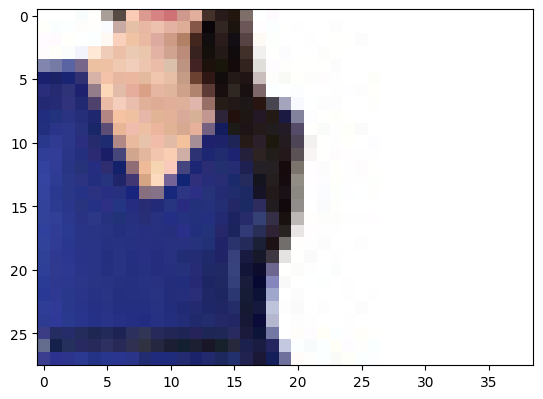

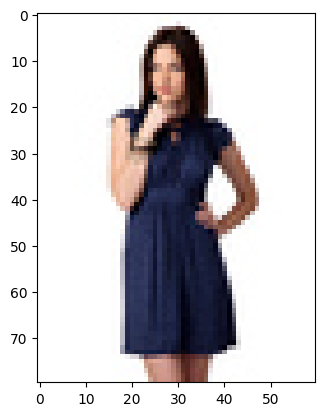

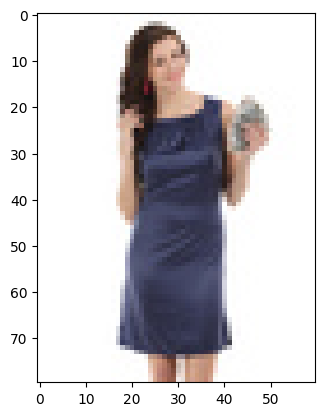

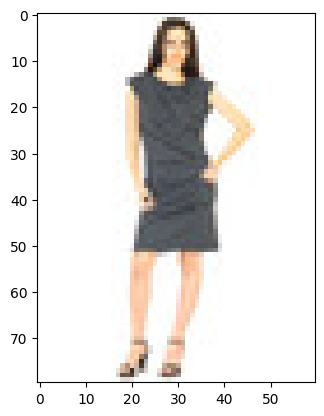

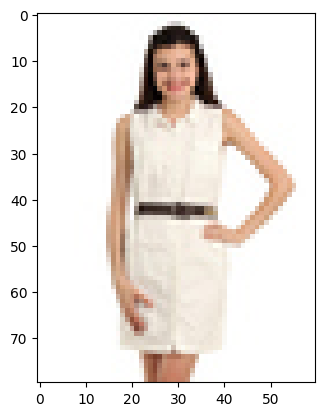

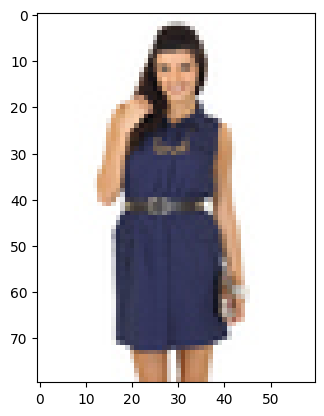

In [36]:
recommendation(img4_path)